In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import gabor
from skimage.feature import local_binary_pattern
from sklearn.cluster import KMeans

In [2]:
def display_image(image, title="Image"):
    plt.figure(figsize=(6, 6))
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis("off")
    plt.show()

def sobel_edges(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    sobel_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
    sobel_combined = cv2.magnitude(sobel_x, sobel_y)  # Combine both edges
    return sobel_x, sobel_y, sobel_combined

def canny_edges(image, threshold1=100, threshold2=200):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, threshold1, threshold2)
    return edges

def laplacian_filter(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    laplacian = cv2.Laplacian(gray, cv2.CV_64F)
    return laplacian

def harris_corner_detector(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = np.float32(gray)
    corners = cv2.cornerHarris(gray, blockSize=2, ksize=3, k=0.04)
    image_with_corners = image.copy()
    image_with_corners[corners > 0.01 * corners.max()] = [0, 0, 255]  # Mark corners in red
    return image_with_corners

def sift_feature_extraction(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    sift = cv2.SIFT_create()
    keypoints, descriptors = sift.detectAndCompute(gray, None)
    image_with_keypoints = cv2.drawKeypoints(image, keypoints, None)
    return image_with_keypoints, keypoints, descriptors

def gabor_texture_extraction(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    frequency = 0.6
    theta = 0  # 0 degree angle
    gabor_filtered, _ = gabor(gray, frequency=frequency, theta=theta)
    return gabor_filtered

def lbp_feature_extraction(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    lbp = local_binary_pattern(gray, P=8, R=1, method="uniform")
    return lbp

def extract_features_for_classification(image):
    _, _, sobel_features = sobel_edges(image)
    canny_features = canny_edges(image)
    laplacian_features = laplacian_filter(image)
    lbp_features = lbp_feature_extraction(image)
    feature_vector = np.stack([
        sobel_features, canny_features, laplacian_features, lbp_features
    ], axis=-1)  # Shape: (height, width, 4)
    reshaped_features = feature_vector.reshape(-1, 4) 
    kmeans = KMeans(n_clusters=3, random_state=42)
    kmeans.fit(reshaped_features)
    clustered_features = kmeans.labels_.reshape(image.shape[:2])
    return clustered_features

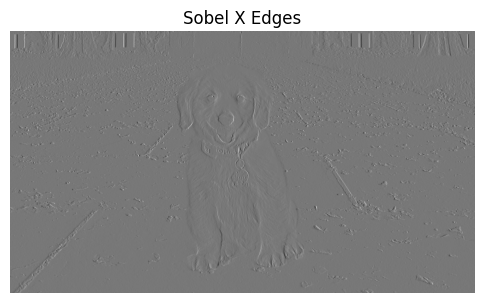

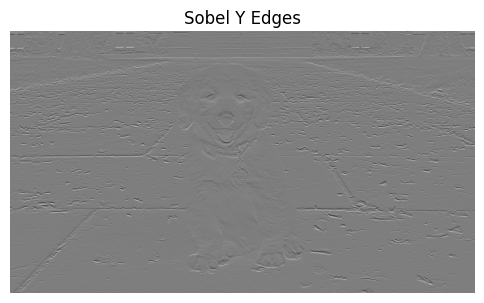

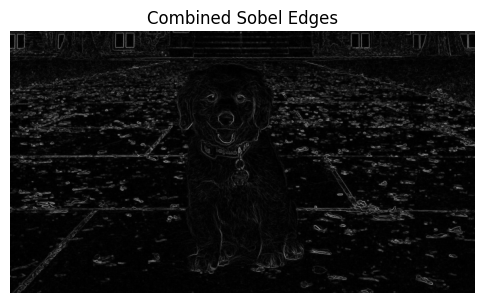

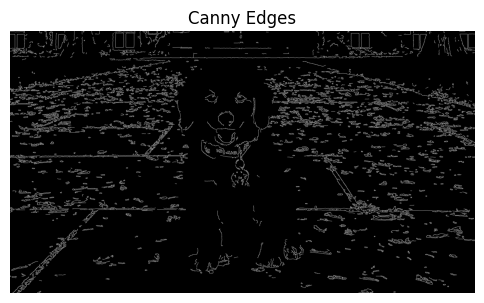

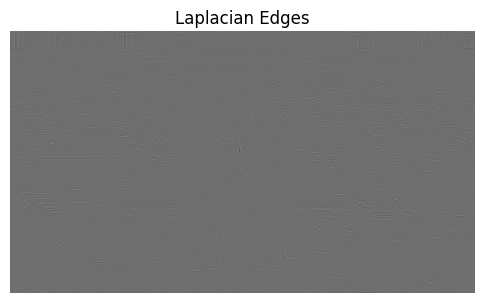

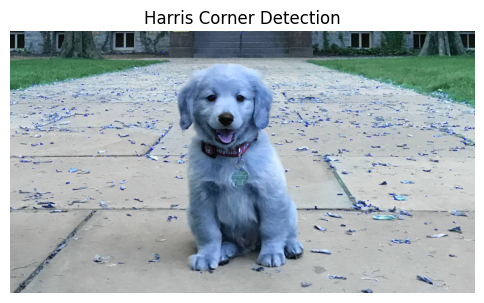

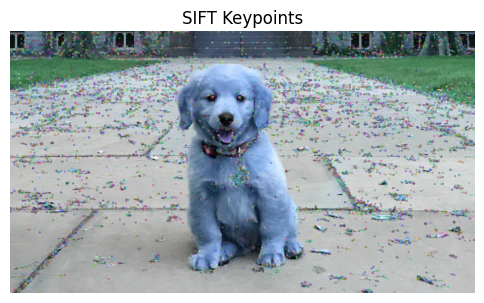

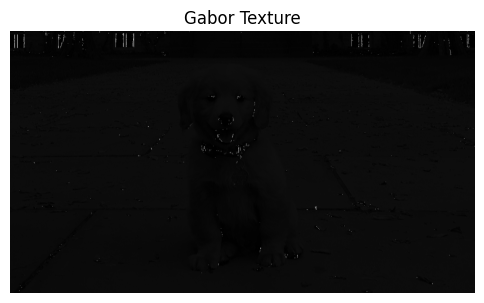

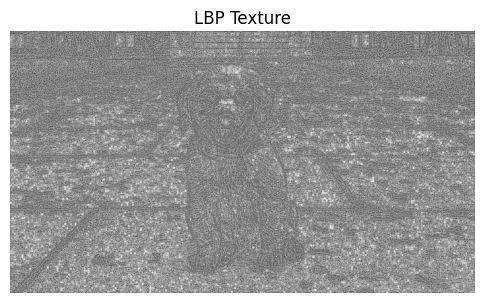

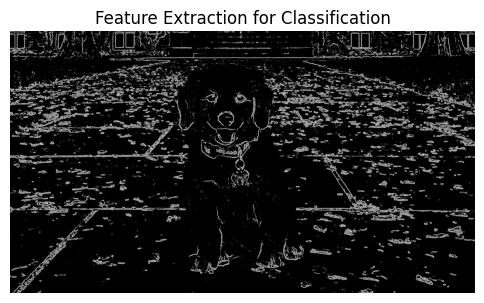

In [3]:
image = cv2.imread("../images/KOA_Nassau_2697x1517.jpg")

# Sobel Edge Detection
sobel_x, sobel_y, sobel_combined = sobel_edges(image)
display_image(sobel_x, "Sobel X Edges")
display_image(sobel_y, "Sobel Y Edges")
display_image(sobel_combined, "Combined Sobel Edges")

# Canny Edge Detection
canny_result = canny_edges(image)
display_image(canny_result, "Canny Edges")

# Laplacian Filter
laplacian_result = laplacian_filter(image)
display_image(laplacian_result, "Laplacian Edges")

# Harris Corner Detection
harris_result = harris_corner_detector(image)
display_image(harris_result, "Harris Corner Detection")

# SIFT Feature Extraction
sift_result, keypoints, descriptors = sift_feature_extraction(image)
display_image(sift_result, "SIFT Keypoints")

# Gabor Texture Extraction
gabor_result = gabor_texture_extraction(image)
display_image(gabor_result, "Gabor Texture")

# Local Binary Pattern (LBP) Texture
lbp_result = lbp_feature_extraction(image)
display_image(lbp_result, "LBP Texture")

# Feature Extraction for Classification
features = extract_features_for_classification(image)
display_image(features, "Feature Extraction for Classification")